In [12]:
from bioblend.galaxy import GalaxyInstance
import pandas as pd
from io import StringIO
import os
import requests
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

# Add galaxy API key
Add `GALAXY_API_KEY` from `https://usegalaxy.eu/user/api_key` via `export GALAXY_API_KEY="<key>"` or `%env  GALAXY_API_KEY=<key>` in jupyter

In [18]:
%env GALAXY_API_KEY=

env: GALAXY_API_KEY=


# Biolytix Data

## Collection of AMR, VR counts

In [14]:
def get_summary_of_collection(gi, collection_name, history_id, column_name):
    """
    Collects the counts of datasets in a collection
    """

    datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

    #print(datasets)

    #fetch collection by name
    if len(datasets) > 1:
        print("too many datasets with that name")

    for dataset in datasets:
        if dataset['history_content_type']=='dataset_collection': #get only collections
            if dataset['job_state_summary']['all_jobs'] == dataset['job_state_summary']['ok']: #get only collections where all jobs are ok
                dataset_collection_id = dataset["id"]

    look_up = {}
    # get data of the elements in the collection
    collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)
    for element in collection['elements']:

        element_name = element['element_identifier']
        element_id = element['object']['id']
        data = gi.datasets.download_dataset(element_id, maxwait = 3)
        df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

        look_up[element_name] = len(df)
        print(element_name, len(df))

    df = pd.DataFrame(look_up.items())
    df.set_index(0, inplace=True)
    df.index.name = "Name"
    df.columns = [column_name]

    return(df)    

## Get df for AMR and VF

Please insert your History ID here

In [4]:
gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

collection_name = "vfs_of_genes_identified_by_vfdb"
history_id = "f5f36039528d7034"
column_name = "VFs"

VF_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

collection_name = "amr_identified_by_ncbi"
history_id = "f5f36039528d7034"
column_name = "AMR"

AMR_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

too many datasets with that name
Spike4Barcode16 1
Spike4Barcode15 8
Spike4Barcode14 0
Spike4Barcode13 0
Spike4Barcode12 0
Spike4Barcode10 0
Spike4Barcode08 0
Spike4Barcode07 0
Spike4Barcode05 0
Spike4Barcode04 0
Spike4Barcode01 82
Spike3bBarcode15 0
Spike3bBarcode14 0
Spike3bBarcode13 0
Spike3bBarcode12 132
Spike3bBarcode11 199
Spike3bBarcode10 12
Spike3Barcode11 1
Spike2bBarcode15 0
Spike2bBarcode14 0
Spike2bBarcode13 0
Spike2bBarcode12 174
Spike2bBarcode11 283
Spike2bBarcode10 276
Spike2Barcode15 0
Spike2Barcode14 0
Spike2Barcode13 0
Spike2Barcode12 173
Spike2Barcode11 284
Spike2Barcode10 201
Spike1Barcode15 0
Spike1Barcode14 0
Spike1Barcode13 0
Spike1Barcode12 0
Spike1Barcode11 120
Spike1Barcode10 192
too many datasets with that name
Spike4Barcode16 0
Spike4Barcode15 0
Spike4Barcode14 0
Spike4Barcode13 0
Spike4Barcode12 0
Spike4Barcode10 0
Spike4Barcode08 0
Spike4Barcode07 0
Spike4Barcode05 0
Spike4Barcode04 0
Spike4Barcode01 3
Spike3bBarcode15 0
Spike3bBarcode14 0
Spike3bBarcode13

In [15]:
frames = [VF_df, AMR_df]
merged_df = pd.concat(frames, axis = 1)

#from IPython.core.display import HTML
print(merged_df.to_string())



                  VFs  AMR
Name                      
Spike4Barcode16     1    0
Spike4Barcode15     8    0
Spike4Barcode14     0    0
Spike4Barcode13     0    0
Spike4Barcode12     0    0
Spike4Barcode10     0    0
Spike4Barcode08     0    0
Spike4Barcode07     0    0
Spike4Barcode05     0    0
Spike4Barcode04     0    0
Spike4Barcode01    82    3
Spike3bBarcode15    0    0
Spike3bBarcode14    0    0
Spike3bBarcode13    0    0
Spike3bBarcode12  132    1
Spike3bBarcode11  199    2
Spike3bBarcode10   12    5
Spike3Barcode11     1    0
Spike2bBarcode15    0    0
Spike2bBarcode14    0    0
Spike2bBarcode13    0    0
Spike2bBarcode12  174    2
Spike2bBarcode11  283    2
Spike2bBarcode10  276    6
Spike2Barcode15     0    0
Spike2Barcode14     0    0
Spike2Barcode13     0    0
Spike2Barcode12   173    1
Spike2Barcode11   284    2
Spike2Barcode10   201    7
Spike1Barcode15     0    0
Spike1Barcode14     0    0
Spike1Barcode13     0    0
Spike1Barcode12     0    0
Spike1Barcode11   120    1
S

## Map with metadata

In [16]:
meta_df = pd.read_excel(open('data/FoodbornePathogenDetectionDataAnalysis.xlsx', 'rb'), sheet_name='Biolytix Spiked') 
meta_df.set_index("Galaxy ID", inplace=True)
meta_df.index.name = "Name"
frames = [merged_df, meta_df]
result = pd.concat(frames, axis = 1)
# print(len(result.columns))
# print(len(meta_df.columns))

print(result.to_string())

                    VFs  AMR Sample Barcode Number DSM-Number  bx-number  Lot-Number Data Sequencing Source Sequencing Date                                                                              Information                                 Expected Strain Deplition  CT Value Enterica  CT Value Houtenae  CT Value Salamae         CT  CFU Enterica  CFU Houtenae  CFU Salamae           CFU Enrichment   Medium  Galaxy Analysis Date  History Link                                                                                                                                                                                                                                                                                                                                                                                                           Comments
Name                                                                                                                                                

## plot it 

### Bar plot (Paul's example)

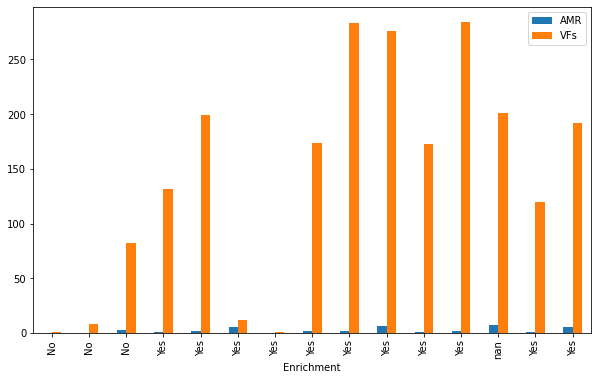

In [17]:
import matplotlib.pyplot as plt
import numpy as np

selection = result[(result["AMR"] != 0) | (result["VFs"] != 0)]
selection = selection.dropna(subset = ["AMR","VFs"])

#print(selection["Enrichment"])
#print(selection.columns)
selection.set_index(["Enrichment"], drop=True, inplace = True)
#print(selection)
selection.plot( kind = "bar",
                #x = ["Enrichment"],
                y = ["AMR","VFs"], 
                figsize=(10,6), 
                )
plt.show()

### Violin Plot

#### for VFs

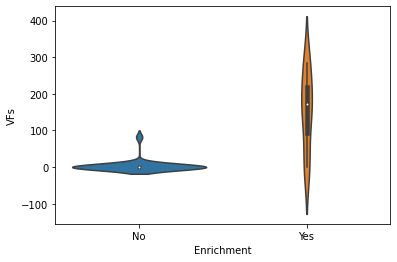

In [8]:
import numpy as np
import seaborn as sns


sns.violinplot(data=result, x="Enrichment", y="VFs")
plt.show()

#### for AMR

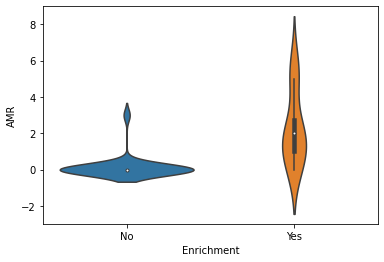

In [9]:
sns.violinplot(data=result, x="Enrichment", y="AMR")
plt.show()

### Scatter Plot

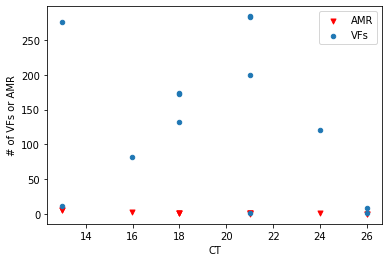

In [10]:
selection = selection.dropna(subset = ["AMR","VFs"])
#selection.set_index(["Enrichment"], drop=True, inplace = True)

ax = selection.plot(kind='scatter', x='CT', y='AMR', color='r', marker='v', s=25, label="AMR")    
selection.plot.scatter(
                x = 'CT',
                y = 'VFs',
                ax=ax, label="VFs")
ax.set_ylabel("# of VFs or AMR")
ax.set_xlabel("CT")
plt.show()

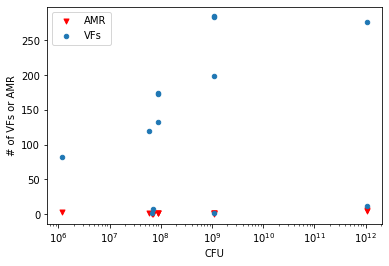

In [11]:
ax = selection.plot(kind='scatter', x='CFU', y='AMR', color='r', marker='v', s=25, label="AMR")    
selection.plot.scatter(
                x = 'CFU',
                y = 'VFs',
                ax=ax, label="VFs")
ax.set_ylabel("# of VFs or AMR")
ax.set_xlabel("CFU")
ax.set_xscale('log')
plt.show()